In [199]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [200]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("Data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [201]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [202]:
df.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [204]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [205]:
df.duplicated().sum()

0

In [206]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [207]:
#Display number missing values per column

In [208]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [209]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [210]:
# check columns types 

In [211]:
# go to clean them 

In [212]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [213]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [214]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [215]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,10754.0,1.812404e+02,6.969818e+00,156.0,176.000000,1.812404e+02,1.860000e+02,2.060000e+02
age,10754.0,2.604190e+01,4.777629e+00,15.0,22.000000,2.600000e+01,2.900000e+01,4.300000e+01
appearance,10754.0,3.640701e+01,2.652654e+01,0.0,12.000000,3.500000e+01,5.900000e+01,1.070000e+02
goals,10754.0,1.255543e-01,2.355851e-01,0.0,0.000000,4.596918e-02,1.722625e-01,1.125000e+01
assists,10754.0,8.697765e-02,1.433513e-01,0.0,0.000000,4.077323e-02,1.331361e-01,4.000000e+00
yellow cards,10754.0,1.897572e-01,4.323879e-01,0.0,0.053191,1.502504e-01,2.482759e-01,3.000000e+01
second yellow cards,10754.0,4.665667e-03,2.523200e-02,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
red cards,10754.0,6.826070e-03,8.114266e-02,0.0,0.000000,0.000000e+00,0.000000e+00,6.923077e+00
goals conceded,10754.0,1.316555e-01,4.423355e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+00
clean sheets,10754.0,4.488090e-02,9.244373e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+01


In [217]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [218]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Preprocess the Data

In [219]:
df_model = df.copy()

In [220]:
df_model.drop(columns=["name","player"],inplace=True)

In [221]:
# Separate categorical and numerical columns
categorical_columns = df_model.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical columns
print("Categorical columns: ", categorical_columns)
print("Numerical columns: ", numerical_columns)


Categorical columns:  ['team', 'position']
Numerical columns:  ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger']


In [222]:
df_model.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


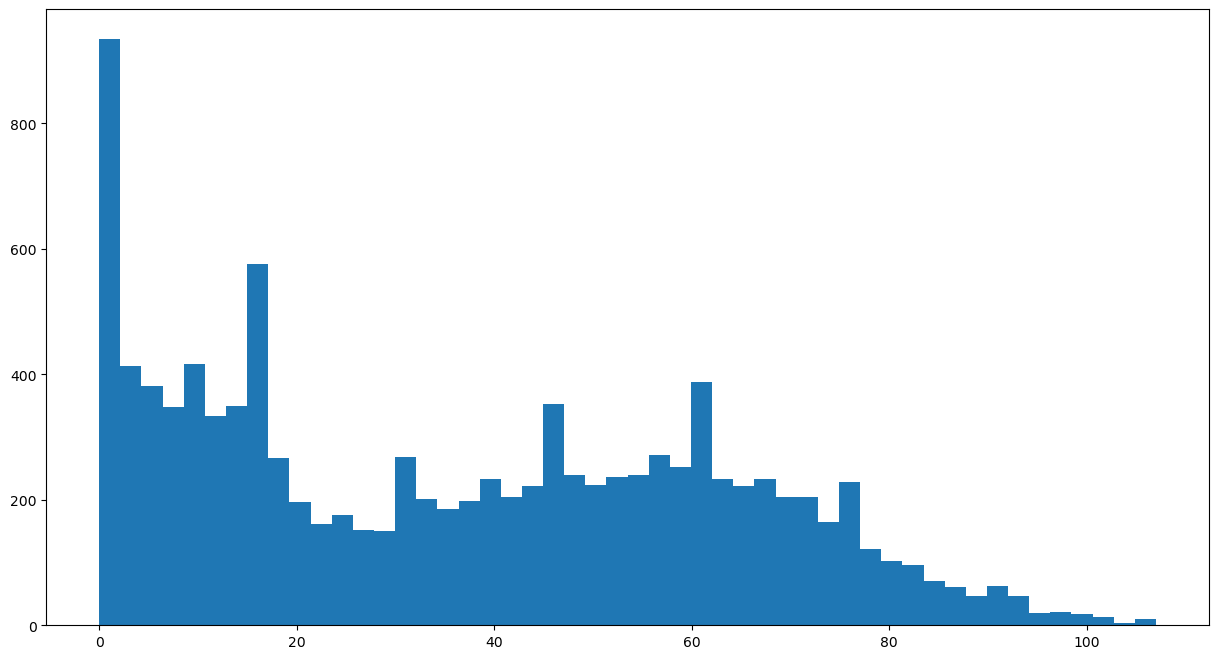

In [223]:
plt.figure(figsize=(15,8))
#plt.boxplot(df['Price']);
plt.hist(df_model['appearance'], bins=50);
#plt.hist(df[(df['appearance']>=100)]['appearance'], bins=23);
plt.show()

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [224]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [225]:
df_model.shape

(10754, 20)

In [226]:
categorical_columns

['team', 'position']

In [227]:
df_model=pd.get_dummies(df_model,columns=categorical_columns)

In [228]:
df_model.shape

(10754, 408)

In [229]:
df_model.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,team_AC Monza,team_ACF Fiorentina,team_AFC Bournemouth,team_AJ Auxerre,team_AS Monaco,team_AS Roma,team_AZ Alkmaar,team_Abha Club,team_Adana Demirspor,team_Adelaide United,team_Ajax Amsterdam,team_Akhmat Grozny,team_Al-Adalah FC,team_Al-Batin FC,team_Al-Fateh SC,team_Al-Fayha FC,team_Al-Hilal Saudi FC,team_Al-Ittihad Club (Jeddah),team_Al-Khaleej,team_Al-Nassr FC,team_Al-Raed SFC,team_Al-Shabab Club (Riyadh),team_Al-Taawoun FC,team_Al-Tai,team_Al-Wehda FC,team_Alanyaspor,team_Albirex Niigata,team_AmaZulu FC,team_América Futebol Clube (MG),team_Angers SCO,team_Antalyaspor,team_Arsenal FC,team_Arsenal Fútbol Club,team_Aston Villa,team_Atalanta BC,team_Athletic Bilbao,team_Atlanta United FC,team_Atlas Guadalajara,team_Atlético de Madrid,team_Atlético de San Luis,team_Austin FC,team_Austria Vienna,team_Avispa Fukuoka,team_Basaksehir FK,team_Bayer 04 Leverkusen,team_Bayern Munich,team_Besiktas JK,team_Birmingham City,team_Blackburn Rovers,team_Blackpool FC,team_Boavista FC,team_Bologna FC 1909,team_Borussia Dortmund,team_Borussia Mönchengladbach,team_Botafogo de Futebol e Regatas,team_Brentford FC,team_Brighton &amp; Hove Albion,team_Brisbane Roar,team_Bristol City,team_Burnley FC,team_CA Banfield,team_CA Barracas Central,team_CA Boca Juniors,team_CA Central Córdoba (SdE),team_CA Colon,team_CA Huracán,team_CA Independiente,team_CA Newell's Old Boys,team_CA Osasuna,team_CA River Plate,team_CA Rosario Central,team_CA San Lorenzo de Almagro,team_CA Sarmiento (Junin),team_CA Vélez Sarsfield,team_CD Cruz Azul,team_CD Godoy Cruz Antonio Tomba,team_CD Santa Clara,team_CF América,team_CF Monterrey,team_CF Montréal,team_CF Pachuca,team_CR Flamengo,team_CS Marítimo,team_CSKA Moscow,team_Cape Town City FC,team_Cardiff City,team_Casa Pia AC,team_Celta de Vigo,team_Central Coast Mariners,team_Cerezo Osaka,team_Charlotte FC,team_Chelsea FC,team_Chicago Fire FC,team_Chippa United,team_Clermont Foot 63,team_Club Athletico Paranaense,team_Club Atlético Belgrano,team_Club Atlético Lanús,team_Club Atlético Platense,team_Club Atlético Talleres,team_Club Atlético Tigre,team_Club Atlético Tucumán,team_Club Atlético Unión,team_Club Estudiantes de La Plata,team_Club León FC,team_Club Necaxa,team_Club Tijuana,team_Club de Gimnasia y Esgrima La Plata,team_Clube Atlético Mineiro,team_Clube de Regatas Vasco da Gama,team_Colorado Rapids,team_Columbus Crew,team_Coritiba Foot Ball Club,team_Coventry City,team_Cruzeiro Esporte Clube,team_Crystal Palace,team_Cuiabá Esporte Clube (MT),team_Cádiz CF,team_D.C. United,team_Daegu FC,team_Daejeon Hana Citizen,team_Damac FC,team_Defensa y Justicia,team_Deportivo Guadalajara,team_Deportivo Toluca,team_Dynamo Moscow,team_ESTAC Troyes,team_Eintracht Frankfurt,team_Elche CF,team_Esporte Clube Bahia,team_Ettifaq FC,team_Everton FC,team_Excelsior Rotterdam,team_FC Arouca,team_FC Augsburg,team_FC Barcelona,team_FC Cincinnati,team_FC Dallas,team_FC Emmen,team_FC Empoli,team_FC Famalicão,team_FC Groningen,team_FC Juárez,team_FC Lorient,team_FC Nantes,team_FC Pari Nizhniy Novgorod,team_FC Paços de Ferreira,team_FC Porto,team_FC Schalke 04,team_FC Seoul,team_FC Sochi,team_FC Tokyo,team_FC Toulouse,team_FC Utrecht,team_FC Vizela,team_FC Volendam,team_FK Khimki,team_FK Krasnodar,team_FK Orenburg,team_FK Rostov,team_Fakel Voronezh,team_Fatih Karagümrük,team_Fenerbahce,team_Feyenoord Rotterdam,team_Fluminense Football Club,team_Fortaleza Esporte Clube,team_Fortuna Sittard,team_Fulham FC,team_GD Chaves,team_GD Estoril Praia,team_Galatasaray,team_Gamba Osaka,team_Gangwon FC,team_Gaziantep FK,team_Getafe CF,team_Gil Vicente FC,team_Giresunspor,team_Girona FC,team_Go Ahead Eagles,team_Goiás Esporte Clube,team_Grêmio Foot-B

#### 3. Feature selection

In [230]:
correlation= df_model.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
                         ...   
position_Attack       -0.027709
position_midfield     -0.032972
age                   -0.050156
goals conceded        -0.063529
position_Goalkeeper   -0.077891
Name: current_value, Length: 408, dtype: float64


In [231]:
# Set the correlation threshold
threshold = 0.1 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur'],
      dtype='object')

In [232]:
selected_features=['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur']

In [233]:
df_model = df_model[selected_features]

In [234]:
df_model.shape

(10754, 20)

In [235]:
df_model.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Chelsea FC,team_FC Barcelona,team_Liverpool FC,team_Manchester City,team_Manchester United,team_Paris Saint-Germain,team_Real Madrid,team_SSC Napoli,team_Tottenham Hotspur
0,104,0.000000,0.000000,9390,42,5,13,15000000,70000000,False,False,False,False,False,False,True,False,False,False,False
1,15,0.000000,0.000000,1304,510,58,1,1500000,22000000,False,False,False,False,False,False,True,False,False,False,False
2,4,0.000000,0.000000,292,697,84,4,600000,6000000,False,False,False,False,False,False,True,False,False,False,False
3,82,0.028090,0.056180,6408,175,22,9,50000000,50000000,False,False,False,False,False,False,True,False,False,False,False
4,63,0.017889,0.017889,5031,238,51,21,40000000,80000000,False,False,False,False,False,False,True,False,False,False,False


#### 4. Prepare train and test data

In [236]:
# Prepare data
X = df_model.drop(["current_value"], axis=1)
y =df_model["current_value"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)



In [237]:
# sacle the data
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
X.shape

(10754, 19)

## Train the Model

In [239]:

model = LinearRegression()


In [240]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [241]:
y_pred = model.predict(X_test_scaled)      

In [242]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [243]:
coeff_df

,Coefficient
appearance,-1.155769e+06
goals,2.651633e+05
assists,1.903815e+05
minutes played,2.109067e+06
days_injured,6.285041e+05
games_injured,-1.273720e+06
award,-1.832248e+06
highest_value,7.653323e+06
team_Arsenal FC,5.197271e+05
team_Bayern Munich,5.943168e+05


In [244]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 3622354.992444496


## Evaluating the Model 

In [245]:
y_base = [y_train.mean()] * len(y_test)

In [246]:
y_base

[3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,


In [251]:
len(y_test)

2151

In [253]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 9.043470e+13


In [254]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')


Mean Squared Error for training: 1.963290e+13
Mean Squared Error for testing: 2.145941e+13


In [255]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.482423e+06


In [256]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.117461e+06
Mean Absolute Error for testing: 2.166732e+06


In [258]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 9.509716e+06


In [259]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')


Root Mean Squared Error for training: 4.430903e+06
Root Mean Squared Error for testing: 4.632430e+06


In [260]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7569871924135702
R Square for testing: 0.7627082335693628


In [263]:
predictions = model.predict(X_test_scaled)
#predictions

In [261]:
Real_Values = np.array(y_test)
# Real_Values

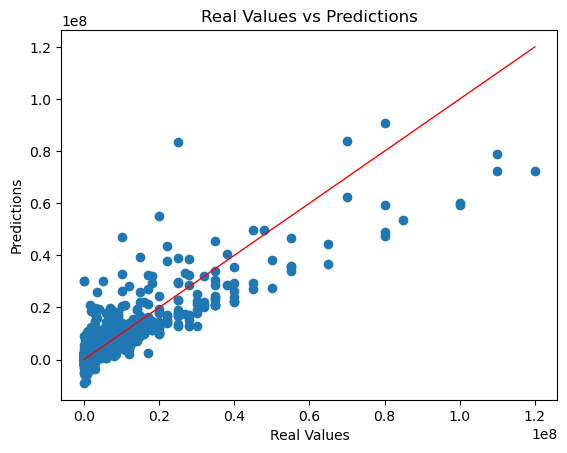

In [264]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()